In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDA PROJECT/supermarket_sales - Sheet1 (1).csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.drop(['Invoice ID','Date','Time'],axis=1)
#cost of goods sold
df['gross margin percentage'].unique()

array([4.76190476])

In [ ]:

df=df.drop(['gross margin percentage'],axis=1)

KeyError: "['gross margin percentage'] not found in axis"

In [ ]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


# Data Visualisation
below graph shows count of females and males is almost same.

In [ ]:
print(df.shape)
df['Gender'].value_counts()

(1000, 16)


Female    501
Male      499
Name: Gender, dtype: int64

C:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

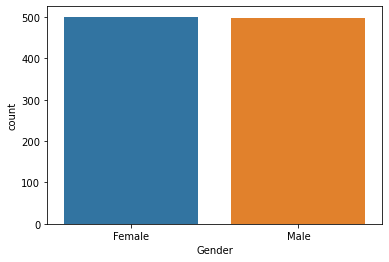

In [ ]:
sns.countplot('Gender',data=df)

creating dummies for gender column for getting numeric data for seaborn barplot.


In [ ]:
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1



joining original data frame(df) with gender dummies data frame(gender_dummies)

In [ ]:



df=pd.concat([df,gender_dummies],axis=1)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

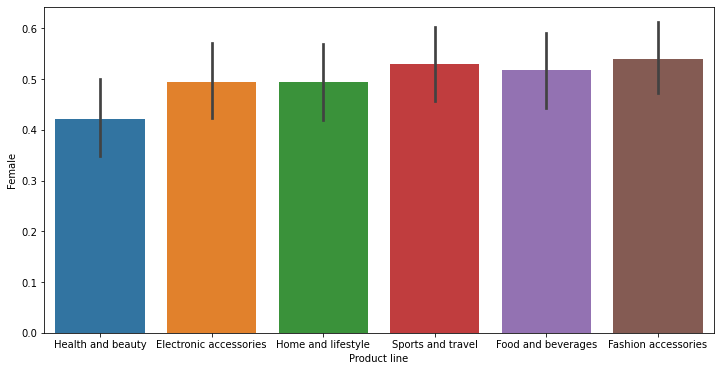

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line', y='Female', data=df)    # here graph will show woman or females have purchase more fashion accessories and more than 50%  purchase done by females.

<AxesSubplot:xlabel='Product line', ylabel='Male'>

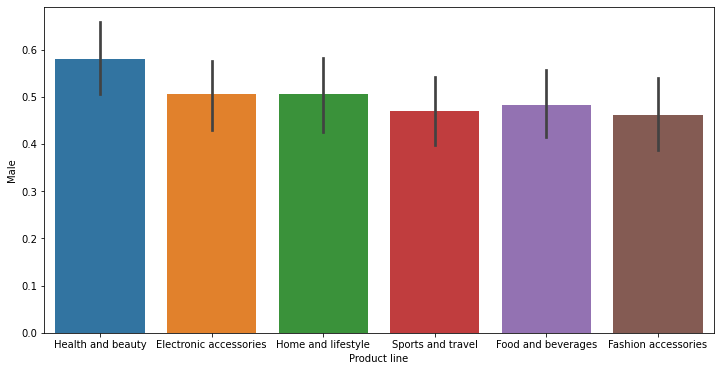

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x='Product line', y='Male',data=df)

Plotting Customers per City

In [ ]:

place_df=pd.DataFrame(df['City'].value_counts())
place_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

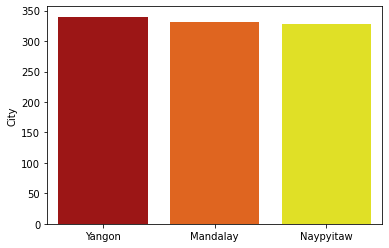

In [ ]:
sns.barplot(x=place_df.index, y=place_df['City'],palette='hot') #here getting palette from seaborn

plotting different payment methods count

In [ ]:
payment_df=pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


<AxesSubplot:ylabel='Payment'>

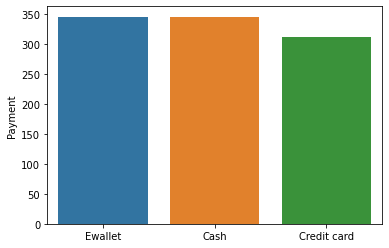

In [ ]:
sns.barplot(x=payment_df.index, y= payment_df.Payment)

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

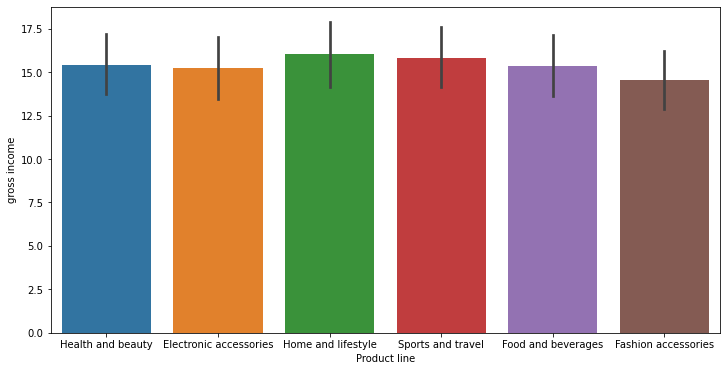

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['gross income'])

getting rating plot for each prduct line



([<matplotlib.axis.XTick at 0x263ccb13c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

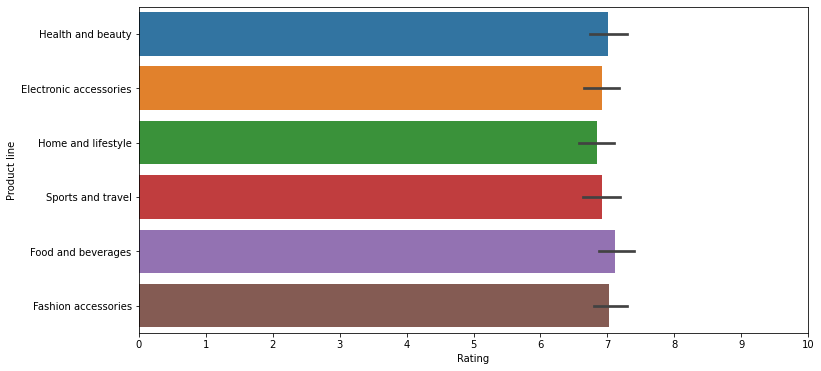

In [ ]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.barplot(y=df['Product line'], x=df['Rating'])
plt.xticks(xdata)

Total bill in each product line

<AxesSubplot:xlabel='Total', ylabel='Product line'>

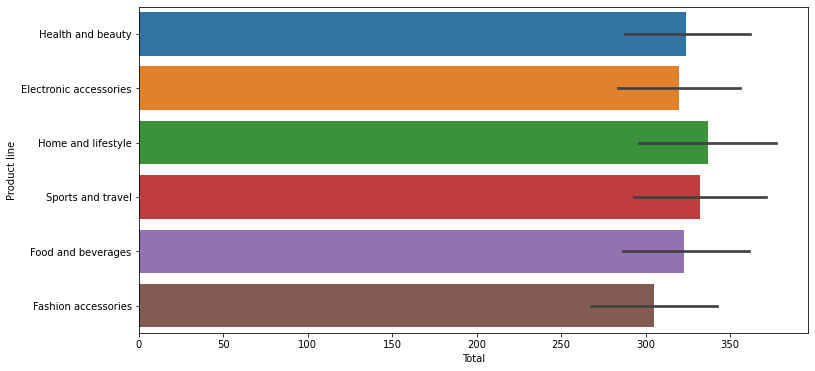

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'],y=df['Product line'])



Exploring Quantity Column

C:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x263ccdd5670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

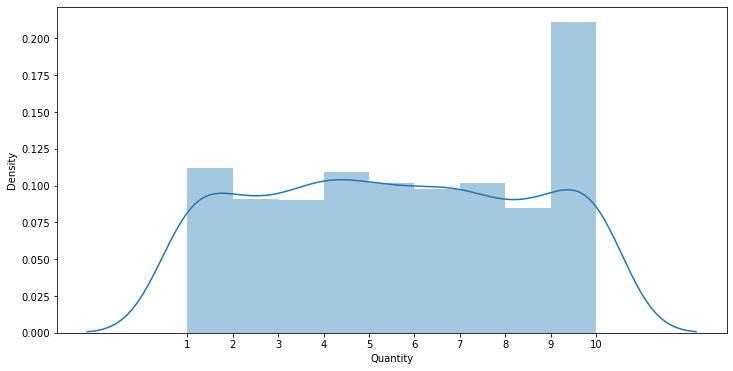

In [ ]:
xdata=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

In [ ]:
quantity_df=pd.DataFrame(df['Quantity'].value_counts())
quantity_df


,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

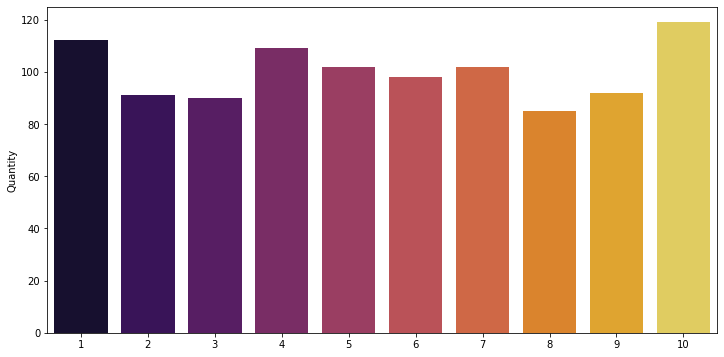

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=quantity_df.index , y= quantity_df['Quantity'], palette='inferno')

Plotting heatmap to check if any correlation between columns

<AxesSubplot:>

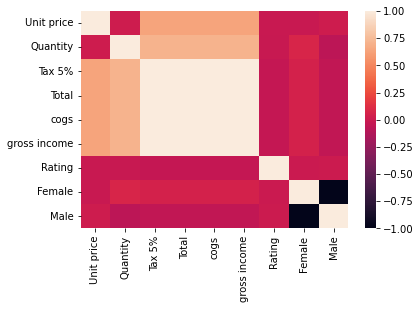

In [ ]:
sns.heatmap(df.corr())

Conclusion from the analysis

1.Total customers=1000

2.Total Females=501

3.Total males= 499

4.Min Rating=4

5.Max Rating=10

6.Average Rating=6.97

7.Best Average Rating  in food & Beverages

8.Max Averages Gross income in Home & Lifestyle

9.Min AVerage Gross income in fashion Accessories

10.Maximum customers biys 10 quantities

11. Max Average total bill in Home and Lifestyle

12.Min Average total bill in Fashion Accessories

13.Minimum People pays thri\ugh e-wallet

14.Minimum People comes from Yagon 

15.Max Average Sales of Fashion Accessories is from Females

16.Max Averages Sales of Health & Beauty is from Males